<a href="https://colab.research.google.com/github/muhfadil26/BigDataFinalExam/blob/master/FinalExamBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gempa Bumi yang terjadi di Indonesia pada tahun 1965 - 2016**

**Big Data Final Project**
*  **Muhammad Fadil: 1706042812**



**Pre-Requisite and Importing**

In [24]:
!pip install chart_studio

In [26]:
import pandas as pd
import numpy as np
import scipy
import statistics 
import matplotlib as mpl
import matplotlib.pyplot as plt

import chart_studio
#chart_studio.tools.set_credentials_file(username='mkcotm', api_key='cGq8WwVZcZMe9Nxt4gS0')

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly import figure_factory as FF
from google.colab import files
Data = files.upload()

**Inport Data Gempa ubmi yang terjadi di Indonesia**

In [27]:
df = pd.read_csv("indonesiadata.csv")
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,3/25/1995,10:44:29 PM,-10.998,166.123,Earthquake,79.4,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,0.90,USP0006UR9,US,US,HRV,Reviewed
1,3/25/1995,10:44:29 PM,-10.998,166.123,Earthquake,79.4,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,0.90,USP0006UR9,US,US,HRV,Reviewed
2,2/7/2013,6:59:16 PM,-10.997,165.655,Earthquake,11.0,NaN,387.0,6.7,MWW,NaN,NaN,26.5,NaN,NaN,1.03,USC000F3FX,US,US,US,Reviewed
3,2/7/2013,6:59:16 PM,-10.997,165.655,Earthquake,11.0,NaN,387.0,6.7,MWW,NaN,NaN,26.5,NaN,NaN,1.03,USC000F3FX,US,US,US,Reviewed
4,11/7/1978,5:34:00 PM,-10.996,162.221,Earthquake,33.0,NaN,NaN,6.1,MS,NaN,NaN,NaN,NaN,NaN,NaN,USP0000XAZ,US,US,US,Reviewed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5841,7/26/1976,2:56:39 AM,4.956,118.308,Earthquake,33.0,NaN,NaN,6.2,MS,NaN,NaN,NaN,NaN,NaN,NaN,USP0000HHH,US,US,US,Reviewed
5842,8/13/1996,10:07:09 AM,4.970,127.397,Earthquake,75.4,3.1,NaN,5.7,MWC,NaN,NaN,NaN,NaN,NaN,1.00,USP0007NGR,US,US,HRV,Reviewed
5843,1/12/1990,3:28:15 PM,4.979,126.508,Earthquake,61.9,9.5,NaN,5.7,MW,NaN,NaN,NaN,NaN,NaN,1.10,USP000445P,US,US,HRV,Reviewed
5844,12/21/2002,5:41:14 PM,4.983,123.158,Earthquake,602.5,2.2,154.0,5.7,MWC,NaN,NaN,NaN,NaN,NaN,0.91,USP000BM43,US,US,HRV,Reviewed


**Menampilkan beberapa data dari .csv**

In [28]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,3/25/1995,10:44:29 PM,-10.998,166.123,Earthquake,79.4,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,0.90,USP0006UR9,US,US,HRV,Reviewed
1,3/25/1995,10:44:29 PM,-10.998,166.123,Earthquake,79.4,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,0.90,USP0006UR9,US,US,HRV,Reviewed
2,2/7/2013,6:59:16 PM,-10.997,165.655,Earthquake,11.0,NaN,387.0,6.7,MWW,NaN,NaN,26.5,NaN,NaN,1.03,USC000F3FX,US,US,US,Reviewed
3,2/7/2013,6:59:16 PM,-10.997,165.655,Earthquake,11.0,NaN,387.0,6.7,MWW,NaN,NaN,26.5,NaN,NaN,1.03,USC000F3FX,US,US,US,Reviewed
4,11/7/1978,5:34:00 PM,-10.996,162.221,Earthquake,33.0,NaN,NaN,6.1,MS,NaN,NaN,NaN,NaN,NaN,NaN,USP0000XAZ,US,US,US,Reviewed


**Menampilkan rangkuman data**

In [29]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,5846.000000,5846.000000,5846.000000,1357.000000,1758.000000,5846.000000,55.000000,593.000000,1716.000000,374.000000,273.000000,4285.000000
mean,-5.077074,135.319655,66.300373,5.369049,226.105802,5.886333,0.058800,37.878583,31.762762,3.169112,6.905495,1.034910
std,3.831973,37.254861,96.824650,4.472702,122.272949,0.427914,0.021668,50.003636,19.531343,3.144901,1.529131,0.161101
min,-10.998000,-131.921000,0.900000,0.000000,18.000000,5.500000,0.030000,1.000000,8.500000,0.136000,1.800000,0.490000
25%,-7.379250,126.125250,26.200000,2.300000,131.000000,5.600000,0.046500,13.000000,18.475000,1.457250,6.100000,0.910000
50%,-5.717000,145.237000,33.700000,4.000000,205.500000,5.800000,0.052000,26.000000,27.800000,2.341500,6.900000,1.010000
75%,-3.199250,154.631000,64.000000,6.700000,306.000000,6.000000,0.064000,42.000000,38.300000,3.787000,7.600000,1.130000
max,4.987000,177.768000,651.200000,40.600000,695.000000,8.400000,0.122000,386.000000,211.000000,23.238000,13.900000,1.700000


**Format: Baris dengan Colom**

In [30]:
df.shape

(5846, 21)

**Keterangan data**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        5846 non-null   object 
 1   Time                        5846 non-null   object 
 2   Latitude                    5846 non-null   float64
 3   Longitude                   5846 non-null   float64
 4   Type                        5845 non-null   object 
 5   Depth                       5846 non-null   float64
 6   Depth Error                 1357 non-null   float64
 7   Depth Seismic Stations      1758 non-null   float64
 8   Magnitude                   5846 non-null   float64
 9   Magnitude Type              5846 non-null   object 
 10  Magnitude Error             55 non-null     float64
 11  Magnitude Seismic Stations  593 non-null    float64
 12  Azimuthal Gap               1716 non-null   float64
 13  Horizontal Distance         374 n

**Mengecek data yang Null**

In [31]:
df.isnull().sum()

Date                             0
Time                             0
Latitude                         0
Longitude                        0
Type                             1
Depth                            0
Depth Error                   4489
Depth Seismic Stations        4088
Magnitude                        0
Magnitude Type                   0
Magnitude Error               5791
Magnitude Seismic Stations    5253
Azimuthal Gap                 4130
Horizontal Distance           5472
Horizontal Error              5573
Root Mean Square              1561
ID                               0
Source                           0
Location Source                  0
Magnitude Source                 0
Status                           0
dtype: int64

**Parameter yang digunakan untuk menampilkan plot data longitude dan Latitude**

In [0]:
latitude_list=[]
longitude_list=[]
for row in df.Latitude:
     latitude_list.append(row)
for row in df.Longitude:
    longitude_list.append(row)

**Menggunakan Basemap untuk ploting**

In [40]:
!apt-get -qq install libgeos-dev
!pip install -qq https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap

earthquake_map = Basemap(projection='robin', lat_0=-90,lon_0=130,resolution='c', area_thresh=1000.0)

Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 133.1MB 48kB/s 
     |████████████████████████████████| 10.9MB 4.8MB/s 
     |████████████████████████████████| 225kB 45.9MB/s 


**Gempa Bui yang terjadi di Indonesia**

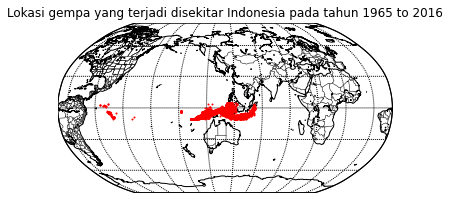

In [41]:
earthquake_map.drawcoastlines()
earthquake_map.drawcountries()
earthquake_map.drawmapboundary()
earthquake_map.bluemarble()
earthquake_map.drawstates()
earthquake_map.drawmeridians(np.arange(0, 360, 30))
earthquake_map.drawparallels(np.arange(-90, 90, 30))

x,y = earthquake_map(longitude_list, latitude_list)
earthquake_map.plot(x, y, 'ro', markersize=1)
plt.title("Lokasi gempa yang terjadi disekitar Indonesia pada tahun 1965 to 2016")
 
plt.show()

**Lokasi gempa dicatat**

In [42]:
g8 = df[df['Magnitude'] > 6.5]
g8['Location Source'].value_counts()

US        406
ISCGEM     79
Name: Location Source, dtype: int64

**Grafik besar magnitude yang terjadi**

Text(0, 0.5, 'Number of Occurrences')

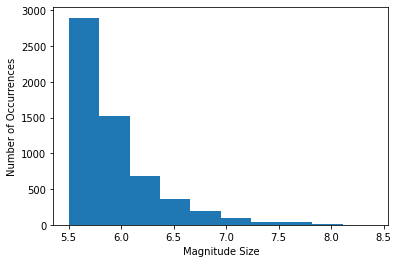

In [43]:
# Plot Distribution plot of 'Magnitude' values

plt.hist(df['Magnitude'])

plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')

Tipe Magnitude, yakni: 



  ML: Local (Richter) magnitude

  MS: surface wave magnitude scale

  MB (Mb): Body wave magnitude scale

  MW (Mw): Moment magnitude scale

  MD (Md): Duration magnitude/signal duration

  MWC: ??

  MWB: ??

  MWW: ??



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Text(0.5, 1.0, 'Perbandingan Magnitude Type dengan Frequensi')

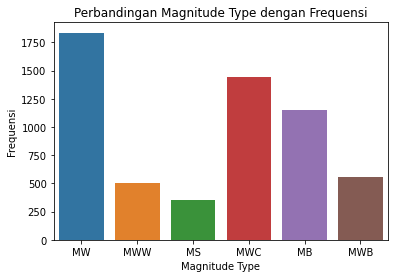

In [44]:
import seaborn as sns
sns.countplot(x="Magnitude Type",data=df)
plt.ylabel('Frequensi')
plt.title('Perbandingan Magnitude Type dengan Frequensi')

In [0]:
import datetime
df['date']=df['Date'].apply(lambda x: pd.to_datetime(x))

In [0]:
df['year']=df['date'].apply(lambda x:str(x).split('-')[0])

**Gempa bumi yang tejadi per tahun**

Text(0.5, 0, 'Number of Earthquakes in each year')

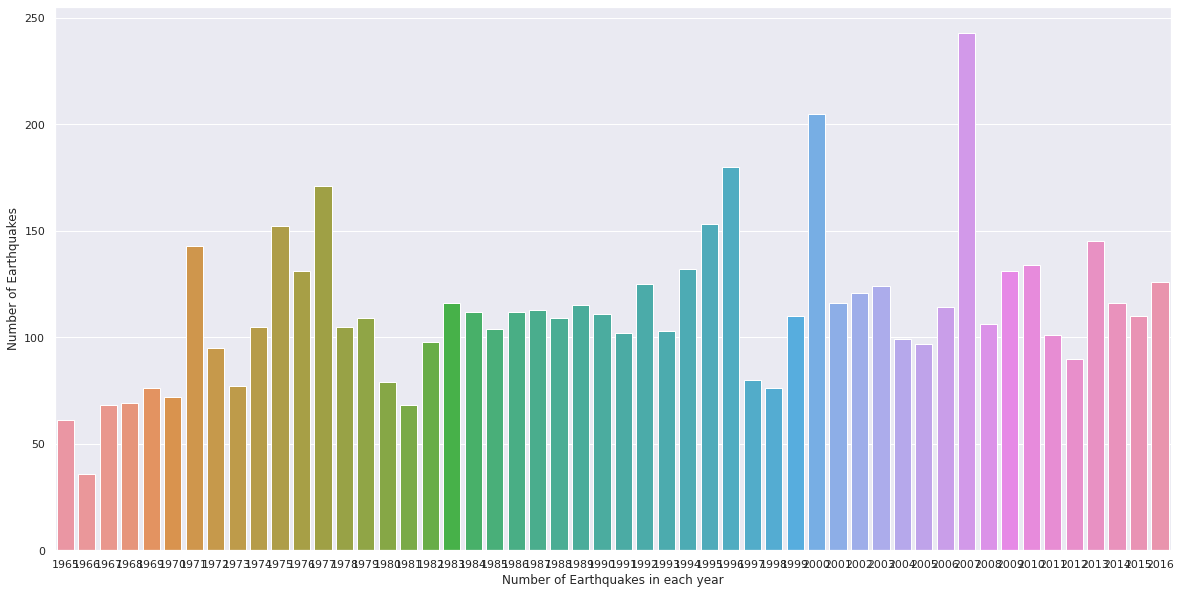

In [47]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.0)
sns.countplot(x="year",data=df)
plt.ylabel('Number of Earthquakes')
plt.xlabel('Number of Earthquakes in each year')

**Data gempa bumi secara table**

In [48]:
df['year'].value_counts()[::-1]

1966     36
1965     61
1967     68
1981     68
1968     69
1970     72
1998     76
1969     76
1973     77
1980     79
1997     80
2012     90
1972     95
2005     97
1982     98
2004     99
2011    101
1991    102
1993    103
1985    104
1974    105
1978    105
2008    106
1979    109
1988    109
2015    110
1999    110
1990    111
1984    112
1986    112
1987    113
2006    114
1989    115
1983    116
2014    116
2001    116
2002    121
2003    124
1992    125
2016    126
2009    131
1976    131
1994    132
2010    134
1971    143
2013    145
1975    152
1995    153
1977    171
1996    180
2000    205
2007    243
Name: year, dtype: int64

**Daftar gempa bumi yang terjadi dengan skala tahun**

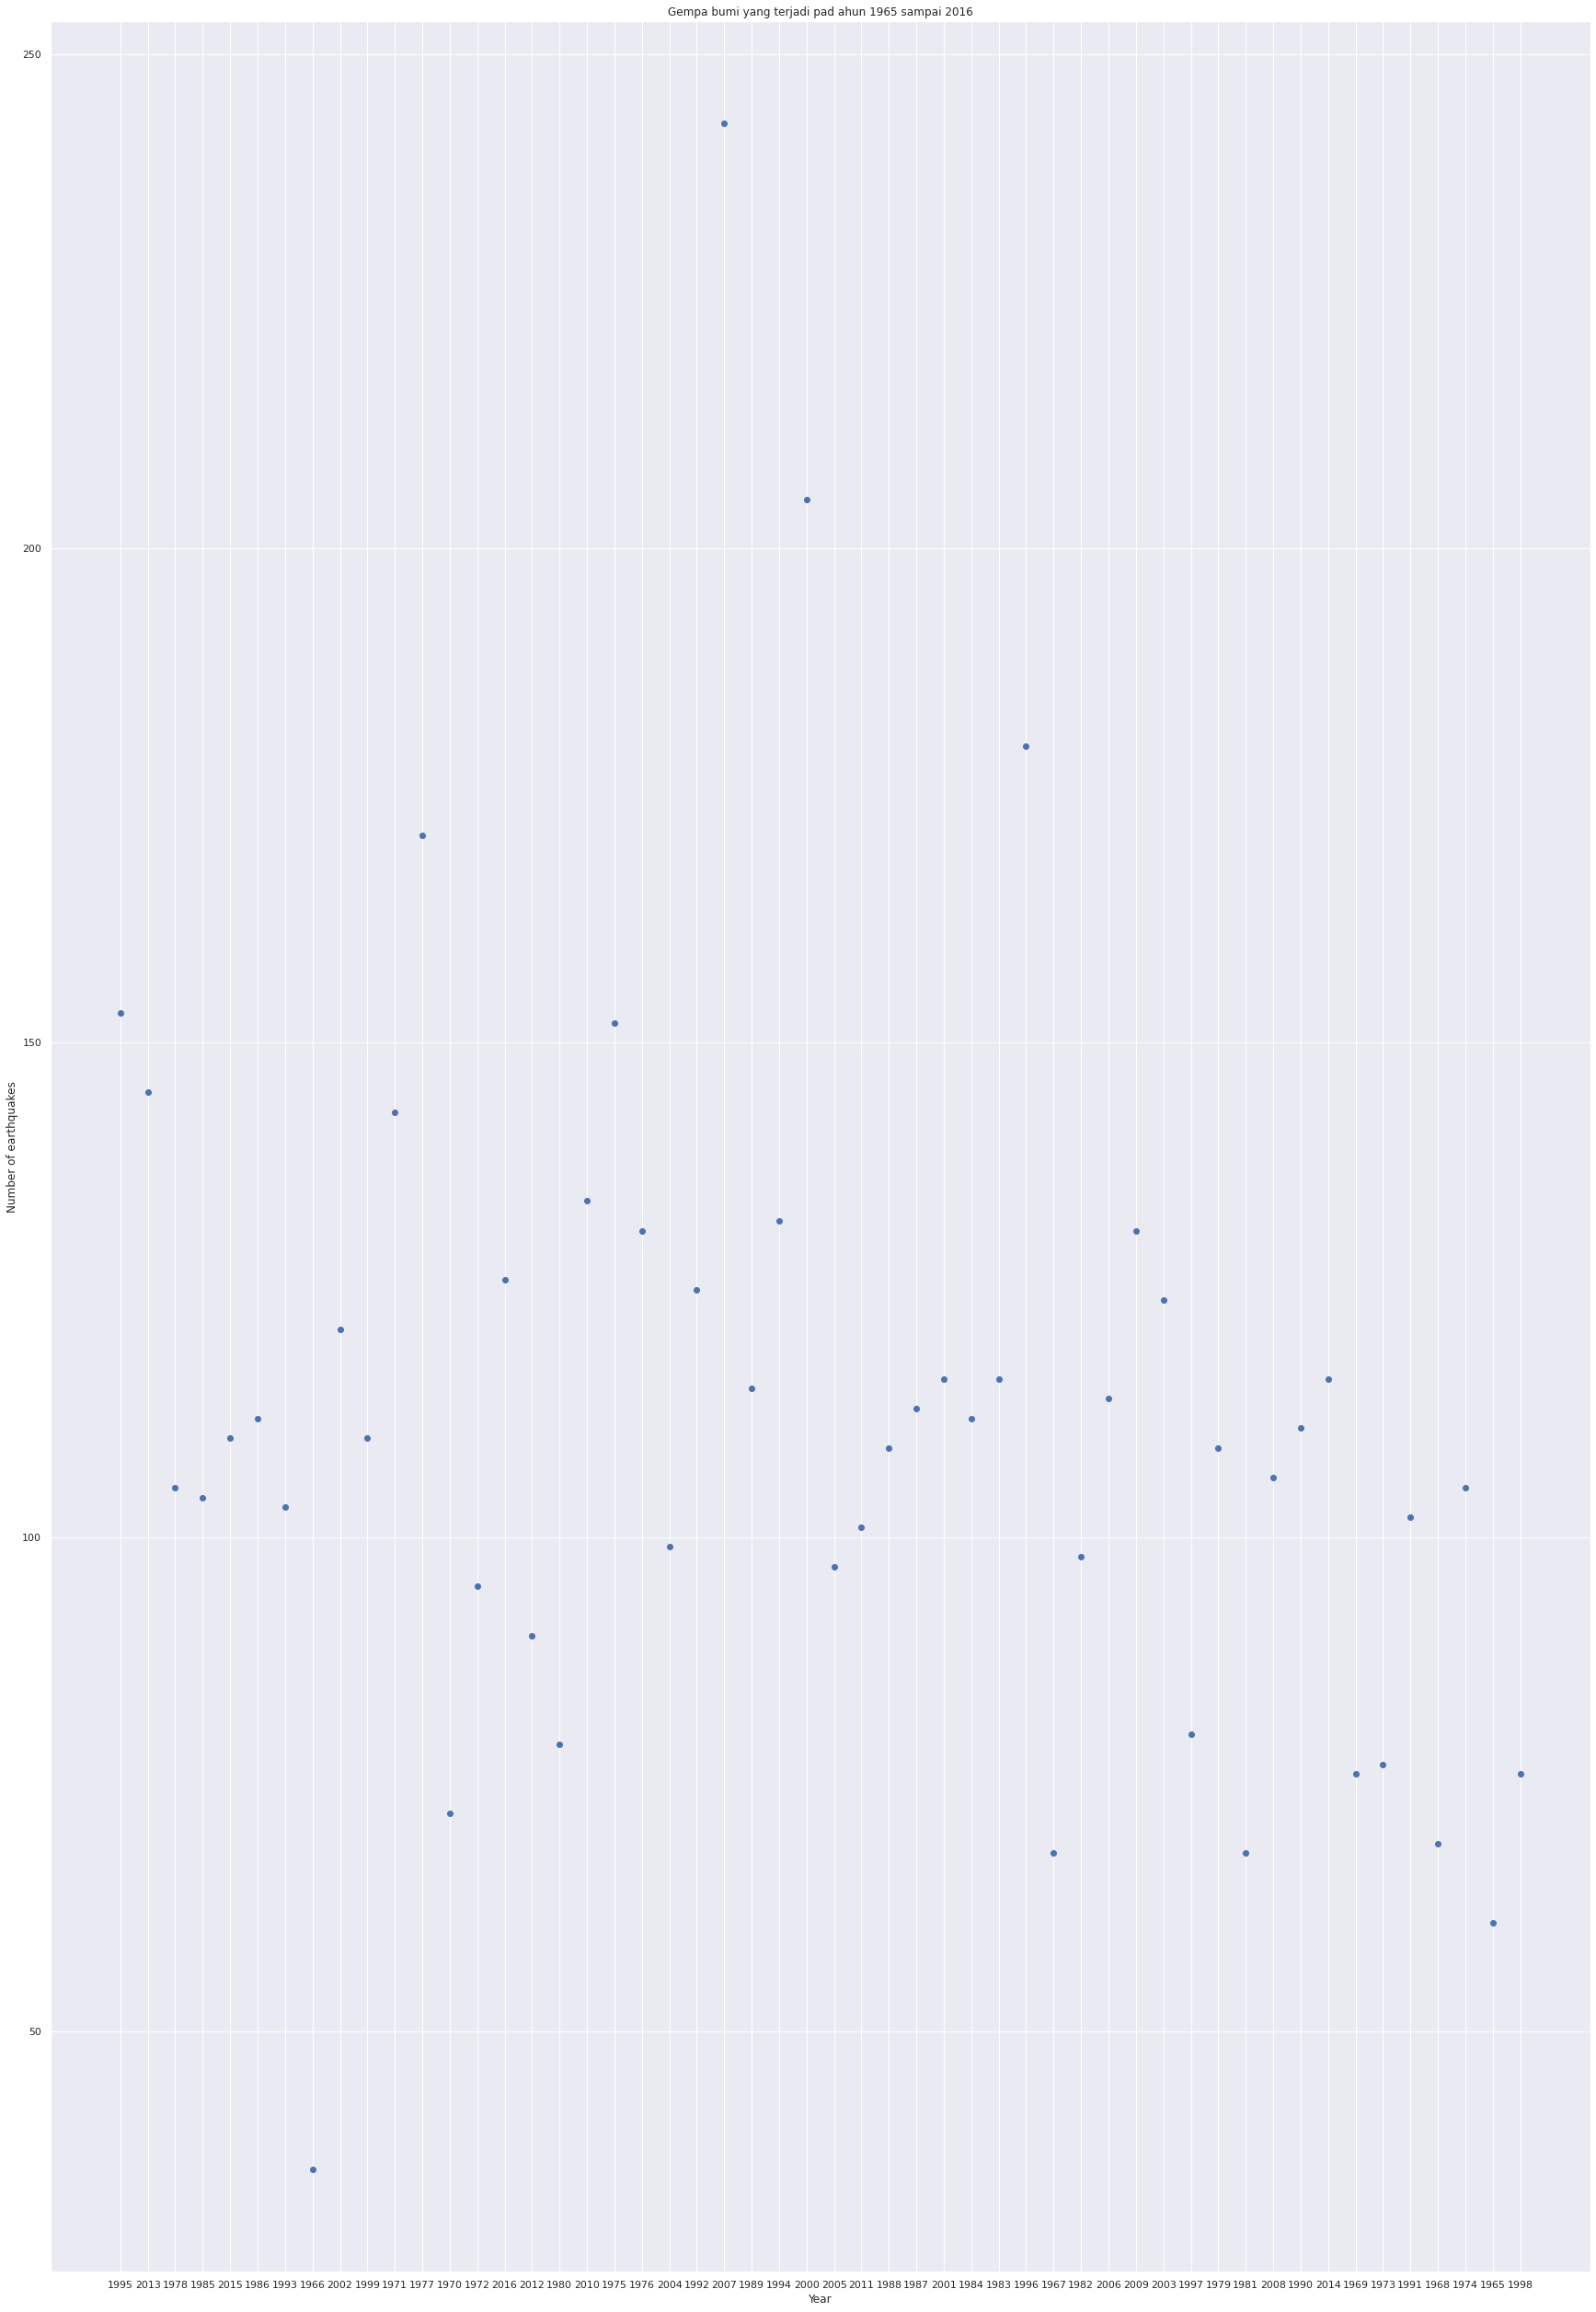

In [49]:
x=df['year'].unique()
y=df['year'].value_counts()
count=[]
for i in range(len(x)):
    count.append(y[x[i]])

plt.figure(figsize=(30,45))    
plt.scatter(x,count)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes')
plt.title('Gempa bumi yang terjadi pad ahun 1965 sampai 2016')
plt.show()

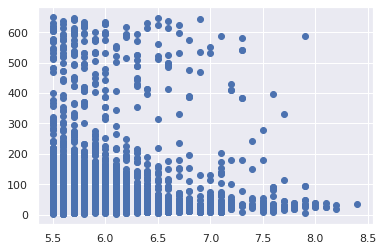

In [50]:
plt.scatter(df["Magnitude"],df["Depth"])

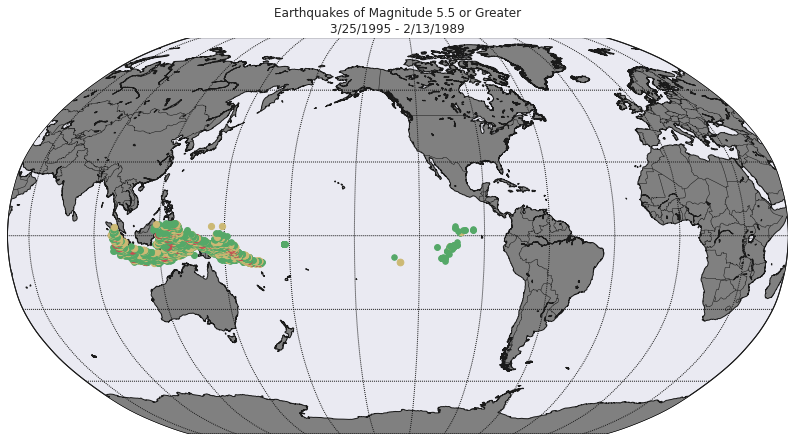

In [51]:
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes (This is just my assumption, it does not reflect
    # the real metric for small, moderate and significant earthquake)
    if magnitude < 6.2:
        return ('go')
    elif magnitude < 7.5:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(14,10))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
# read longitude, latitude and magnitude
lons = df['Longitude'].values
lats = df['Latitude'].values
magnitudes = df['Magnitude'].values
timestrings = df['Date'].tolist()
    
min_marker_size = 0.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag # * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 5.5 or Greater\n"
title_string += "%s - %s" % (timestrings[0][:10], timestrings[-1][:10])
plt.title(title_string)

plt.show()

In [52]:
df2 = pd.read_csv("fulldata.csv")
df2

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


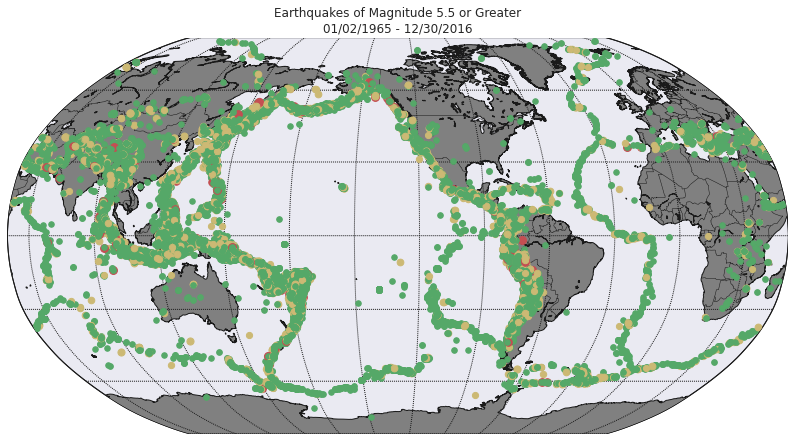

In [53]:
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes (This is just my assumption, it does not reflect
    # the real metric for small, moderate and significant earthquake)
    if magnitude < 6.2:
        return ('go')
    elif magnitude < 7.5:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(14,10))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
# read longitude, latitude and magnitude
lons = df2['Longitude'].values
lats = df2['Latitude'].values
magnitudes = df2['Magnitude'].values
timestrings = df2['Date'].tolist()
    
min_marker_size = 0.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag # * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 5.5 or Greater\n"
title_string += "%s - %s" % (timestrings[0][:10], timestrings[-1][:10])
plt.title(title_string)

plt.show()

In [54]:
df['Location Source'].value_counts()[:5]

US        5224
ISCGEM     621
GCMT         1
Name: Location Source, dtype: int64

In [55]:
# Magnitude Source

# Display most common magnitude sources

df['Magnitude Source'].value_counts()[:5]

US        2699
HRV       2014
ISCGEM     621
GCMT       401
NC         109
Name: Magnitude Source, dtype: int64

In [56]:
# Minumum magnitude

df['Magnitude'].min()

5.5

In [57]:
# Maximum magnitude

df['Magnitude'].max()

8.4

In [58]:
g8 = df[df['Magnitude'] > 8]
g8['Location Source'].value_counts()

US        4
ISCGEM    2
Name: Location Source, dtype: int64

In [59]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status', 'date',
       'year'],
      dtype='object')

In [60]:
df = df[['Date', 'Latitude', 'Longitude', 'Magnitude', 'Type']]
df.head()

,Date,Latitude,Longitude,Magnitude,Type
0,3/25/1995,-10.998,166.123,6.2,Earthquake
1,3/25/1995,-10.998,166.123,6.2,Earthquake
2,2/7/2013,-10.997,165.655,6.7,Earthquake
3,2/7/2013,-10.997,165.655,6.7,Earthquake
4,11/7/1978,-10.996,162.221,6.1,Earthquake


In [61]:
df['Date'] = pd.to_datetime(df['Date'])
print(set(df['Type']))
df.head()

{'Earthquake', nan}


,Date,Latitude,Longitude,Magnitude,Type
0,1995-03-25,-10.998,166.123,6.2,Earthquake
1,1995-03-25,-10.998,166.123,6.2,Earthquake
2,2013-02-07,-10.997,165.655,6.7,Earthquake
3,2013-02-07,-10.997,165.655,6.7,Earthquake
4,1978-11-07,-10.996,162.221,6.1,Earthquake


In [62]:
print('Size of the Dataframe', df.shape)
eq = df[df['Type'] == 'Earthquake']
others = df[df['Type'] != 'Earthquake']
vol = df[df['Type'] == 'Earthquake']

Size of the Dataframe (5846, 5)


No handles with labels found to put in legend.


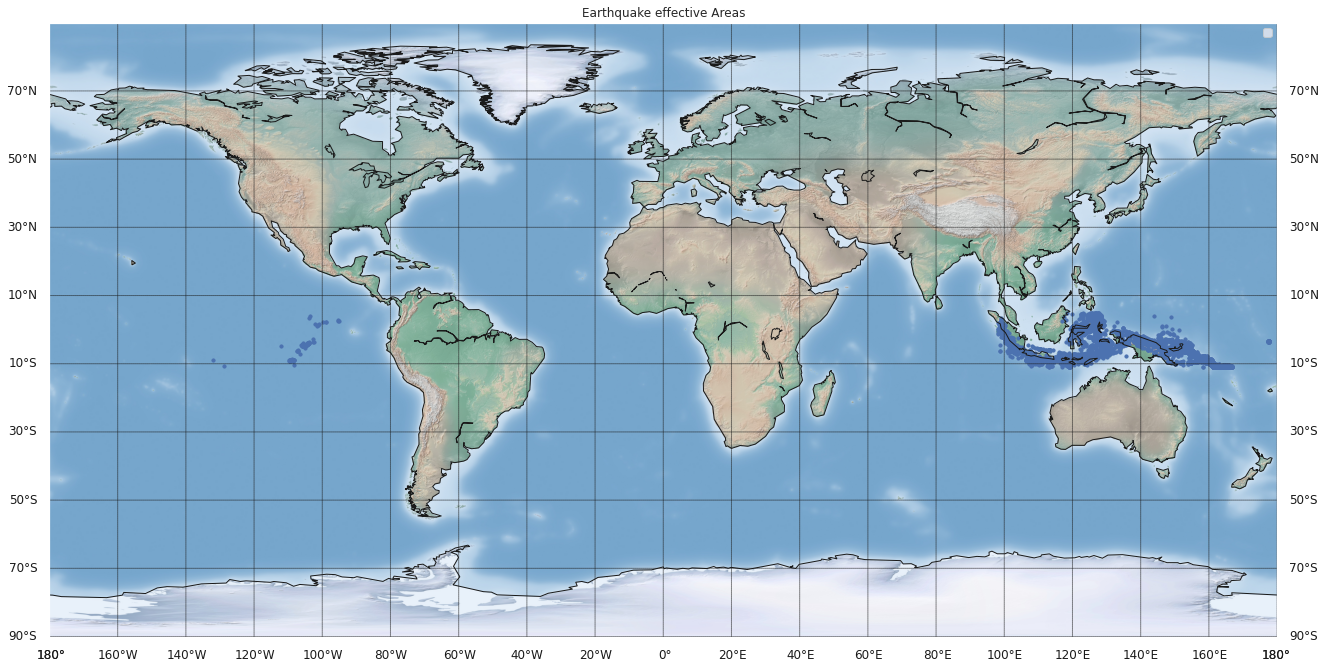

In [63]:
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
import os
#!pip install pyproj==1.9.6
#import conda

#conda_file_dir = conda.__file__
#conda_dir = conda_file_dir.split('lib')[0]
#proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
#os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


fig = plt.figure(figsize = (22, 20))
wmap = Basemap()
longitudes = eq['Longitude'].tolist()
latitudes = eq['Latitude'].tolist()
x_eq, y_eq = wmap(longitudes, latitudes)
longitudes = others['Longitude'].tolist()
latitudes = others['Latitude'].tolist()
x_oth, y_oth = wmap(longitudes, latitudes)
longitudes = vol['Longitude'].tolist()
latitudes = vol['Latitude'].tolist()
x_vol, y_vol = wmap(longitudes, latitudes)
plt.title('Earthquake effective Areas')
wmap.drawcoastlines()
wmap.shadedrelief()
wmap.scatter(x_eq, y_eq, s = 5, c = 'r', alpha = 0.2)
wmap.scatter(x_oth, y_oth, s = 10, c = 'g')
wmap.scatter(x_vol, y_vol, s = 10, c = 'b')
# draw parallels
wmap.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridians
wmap.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
ax = plt.gca()
red_patch = mpatches.Patch(color='r', label='Earthquake')
green_patch = mpatches.Patch(color='g', label='Nuclear Explosion/Rockburst/Others')
blue_patch = mpatches.Patch(color='b', label='Volcanic Eruptions')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.legend()
plt.show()

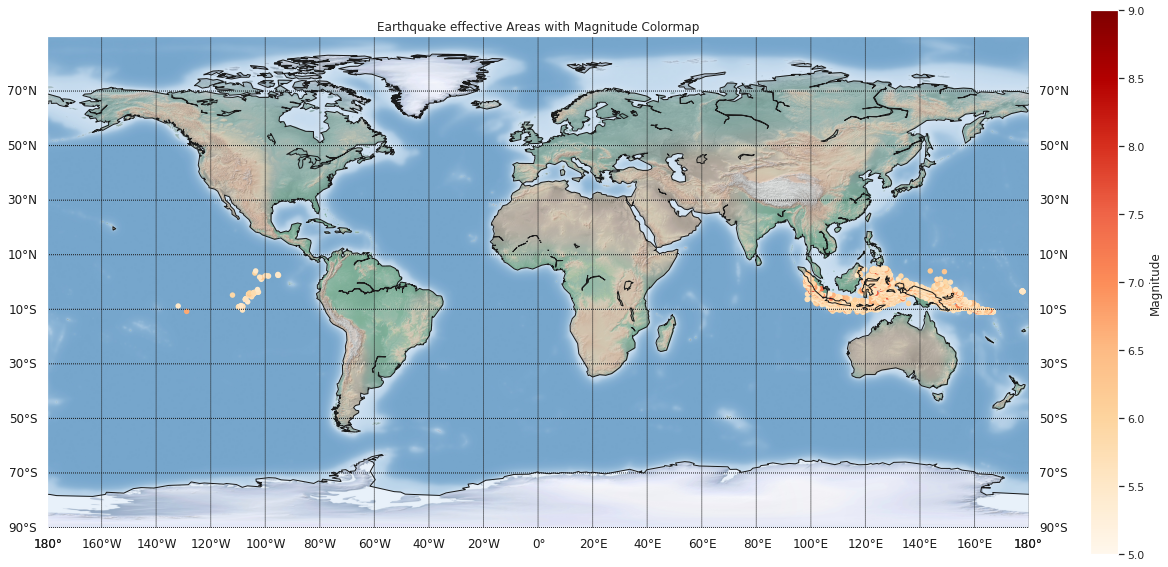

In [64]:
fig = plt.figure(figsize = (22, 20))
wmap = Basemap()
longitudes = eq['Longitude'].tolist()
latitudes = eq['Latitude'].tolist()
x_eq, y_eq = wmap(longitudes, latitudes)
wmap.drawcoastlines()
wmap.shadedrelief()
# draw parallels
wmap.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridians
wmap.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
plt.title('Earthquake effective Areas with Magnitude Colormap')
sc =wmap.scatter(x_eq, y_eq, s = 30, c = eq['Magnitude'], vmin=5, vmax =9, cmap='OrRd', edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('Magnitude')
plt.show()

In [65]:
df['Date'].value_counts()[:1]

2013-02-06    30
Name: Date, dtype: int64

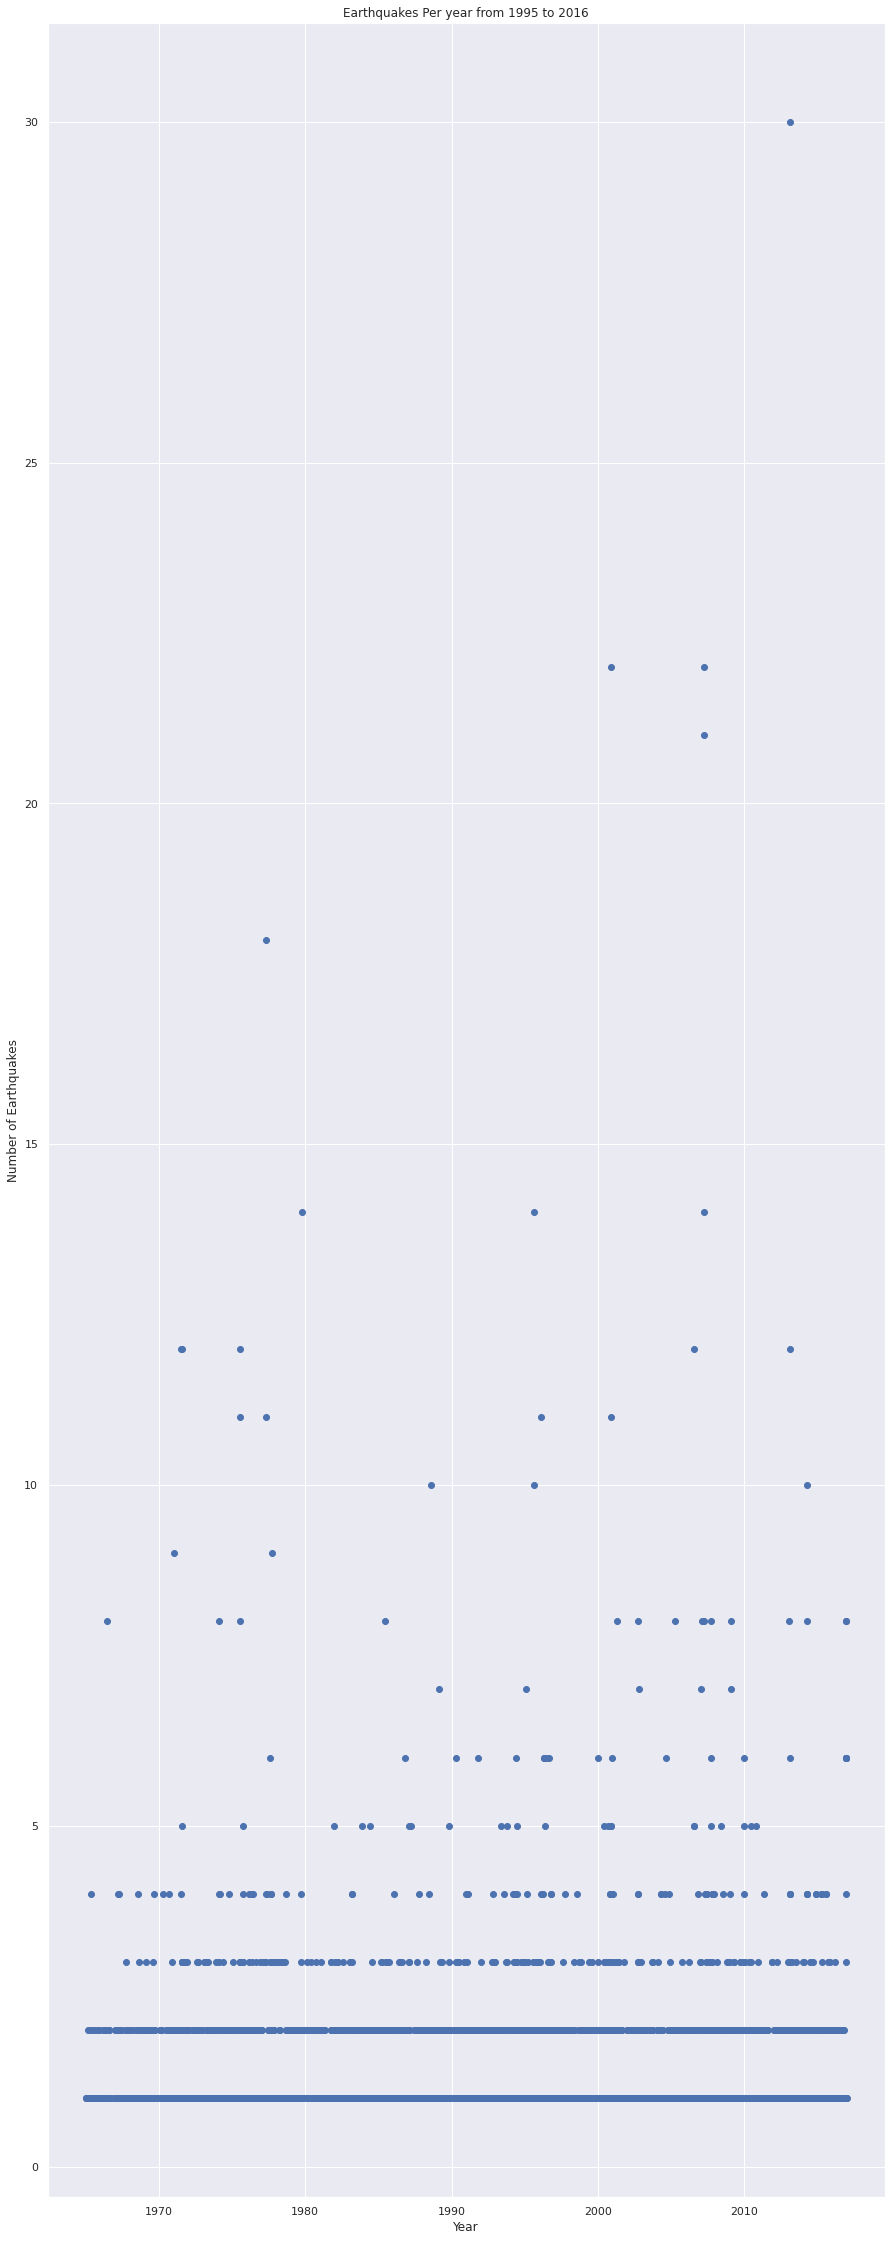

In [66]:
# Correct match (year, number of earthquakes)

x = df['Date'].unique()
y = df['Date'].value_counts()

count = []
for i in range(len(x)):
    key = x[i]
    count.append(y[key])

# Earthquakes Variations over the years

plt.figure(figsize=(15, 40))

plt.scatter(x, count)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes Per year from 1995 to 2016')
plt.show()

In [67]:
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
len(df)

5846

In [0]:
df.Date = pd.to_datetime(df.Date)
df.sort_values("Date", inplace=True)

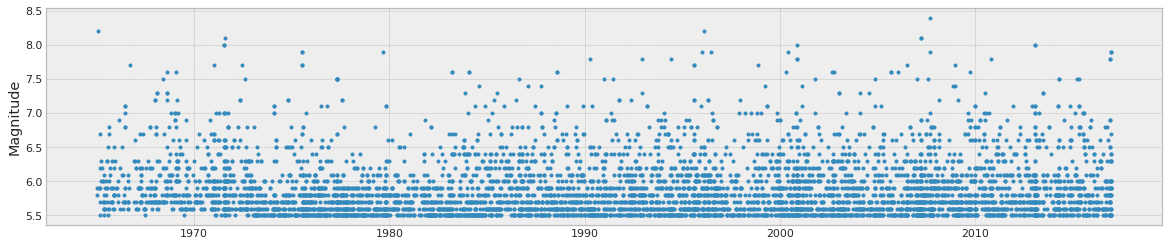

In [69]:
fig = plt.figure()
fig.set_size_inches(20, 4)
plt.plot(df.Date, df.Magnitude, ".");
plt.ylabel("Magnitude");

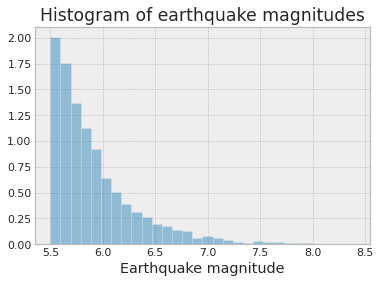

In [70]:
df.Magnitude.hist(density=True, alpha=0.5, bins=30)
plt.xlabel("Earthquake magnitude")
plt.title("Histogram of earthquake magnitudes");

In [71]:
duration = df.Date.max() - df.Date.min()
density = len(df) / float(duration.days)
density  # events per day

0.3078948754410913

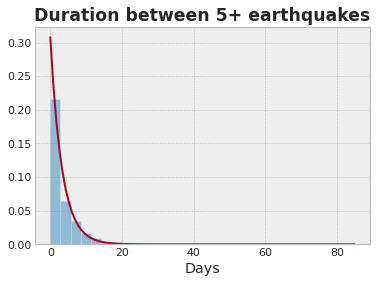

In [72]:
# calculate the time delta between successive rows and convert into days
interarrival = df.Date.diff().dropna().apply(lambda x: x / np.timedelta64(1, "D"))
support = np.linspace(interarrival.min(), interarrival.max(), 100)
interarrival.hist(density=True, alpha=0.5, bins=30)
plt.plot(support, scipy.stats.expon(scale=1/density).pdf(support), lw=2)
plt.title("Duration between 5+ earthquakes", weight="bold")
plt.xlabel("Days");

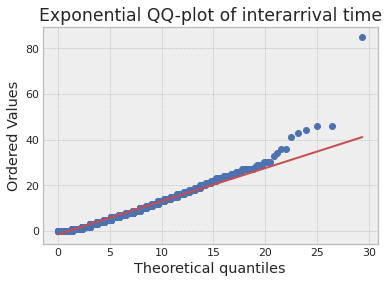

In [73]:
shape, loc = scipy.stats.expon.fit(interarrival)
scipy.stats.probplot(interarrival, dist="expon", sparams=(shape, loc), plot=plt.figure().add_subplot(111))
plt.title("Exponential QQ-plot of interarrival time");

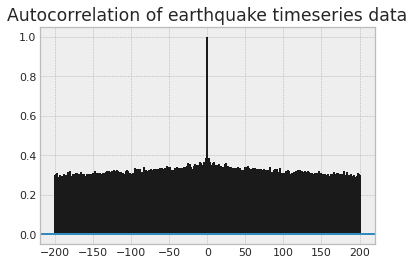

In [74]:
plt.acorr(interarrival, maxlags=200)
plt.title("Autocorrelation of earthquake timeseries data");

Significant Earth Quake, 1965-2016 (https://www.kaggle.com/usgs/earthquake-database)